In [2]:
import matplotlib.pyplot as plt
import os
import json

In [38]:
# TODO: modify work dir in 'expr'
work_dir = 'expr_classroom_schedule_unnetlimit'


In [45]:
source_data = []

for i in range(2):
    source_data_path = os.path.join(work_dir, f'data_record_source_{i}.json')
    with open(source_data_path, 'r') as file:
        source_data.append(json.load(file))

color = [
    '#FA7F6F',
'#8ECFC9',
'#FFBE7A',

'#82B0D2',
'#BEB8DC',
'#E7DAD2'
]

In [46]:
transmit1 = [[], []]
service1 = [[], []]
transmit2 = [[], []]
service2 = [[], []]
transmit3 = [[], []]

for i in range(2):
    for key in sorted(source_data[i], key= lambda i:int(i)):
        task = source_data[i][key]
        pipeline = task['pipeline']

        transmit1[i].append(pipeline[0]['execute_data']['transmit_time'])
        service1[i].append(pipeline[0]['execute_data']['service_time'])
        transmit2[i].append(pipeline[1]['execute_data']['transmit_time'])
        service2[i].append(pipeline[1]['execute_data']['service_time'])
        transmit3[i].append(pipeline[2]['execute_data']['transmit_time'])



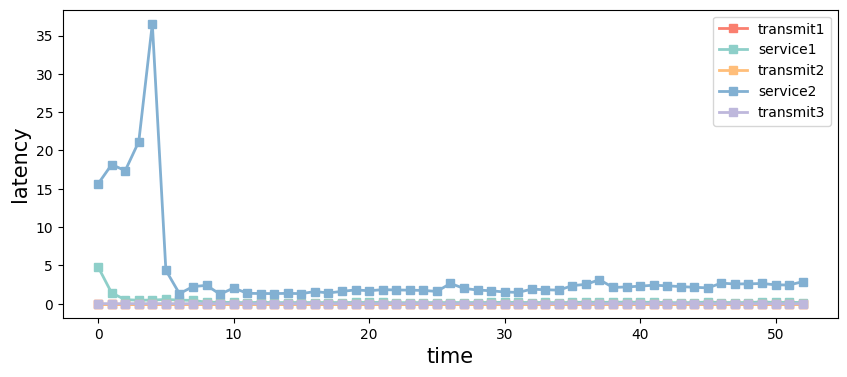

In [47]:
data_source_index= 1
plt.figure(figsize=(10,4))
plt.xlabel('time', fontsize=15)
plt.ylabel('latency', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.plot(transmit1[data_source_index], color=color[0], linewidth=2, marker='s',label=f'transmit1')
plt.plot(service1[data_source_index], color=color[1], linewidth=2, marker='s',label=f'service1')
plt.plot(transmit2[data_source_index], color=color[2], linewidth=2, marker='s',label=f'transmit2')
plt.plot(service2[data_source_index], color=color[3], linewidth=2, marker='s',label=f'service2')
plt.plot(transmit3[data_source_index], color=color[4], linewidth=2, marker='s',label=f'transmit3')

# plt.ylim(0,10)
plt.legend()

In [48]:
def calculate_total_time(pipeline):
        latency = 0
        for task in pipeline:
            latency += task['execute_data']['transmit_time']
            if task['service_name'] != 'end':
                latency += task['execute_data']['service_time']
        return latency

In [49]:
total_latency = [[], []]

for i in range(2):
    for key in source_data[i]:
        task = source_data[i][key]
        latency = calculate_total_time(task['pipeline'])
        meta_data = task['meta_data']
        latency = latency/int(meta_data['frame_number']*meta_data['fps_raw']/meta_data['fps'])
        total_latency[i].append(latency)

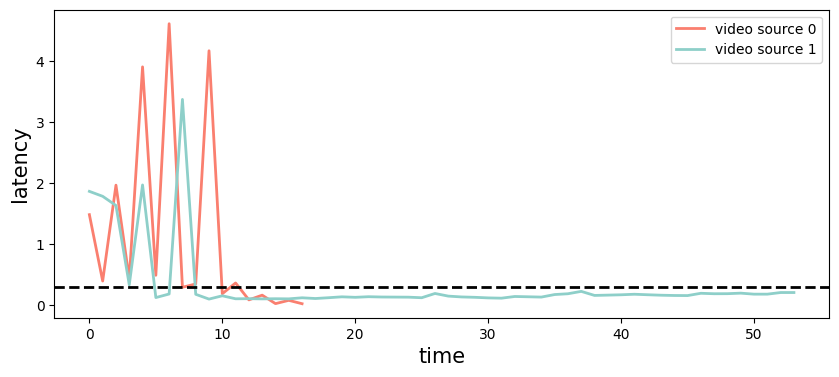

In [50]:
        total_latency[i].append(latency)
plt.figure(figsize=(10, 4))
plt.xlabel('time', fontsize=15)
plt.ylabel('latency', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i in range(2):
    plt.plot(total_latency[i], color=color[i], linewidth=2, label=f'video source {i}')

plt.axhline(y=0.3, color='black', linestyle='--', linewidth=2)
# plt.ylim(0, 1.5)
plt.legend()

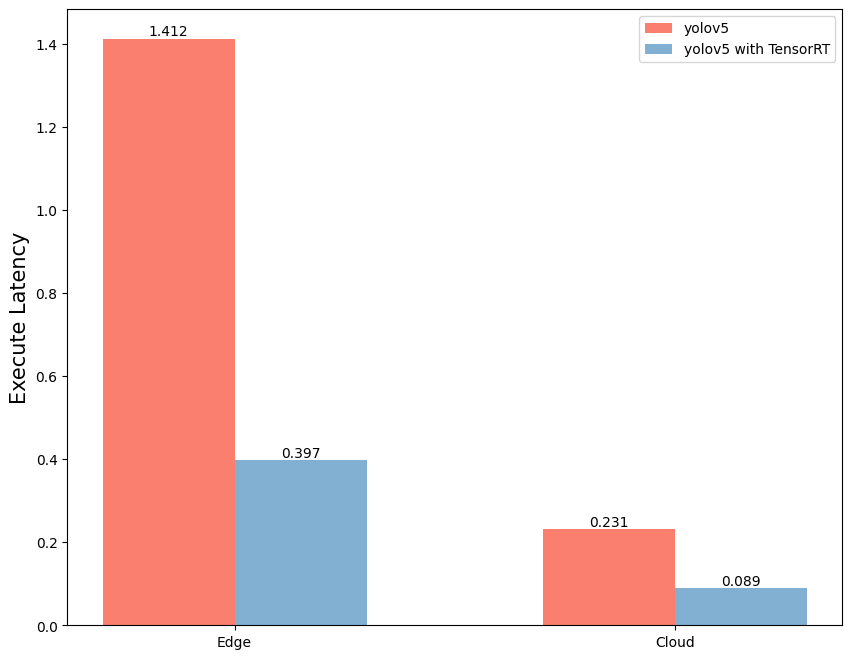

In [19]:
colors = ['#FA7F6F', '#82B0D2']

plt.figure(figsize=(10, 8))

x_tick = ['Edge', 'Cloud']

width = 0.15

x = list(range(len(x_tick)))
x = [xx/2 for xx in x]
x1 = [i-width/2 for i in x]
x2 = [i+width/2 for i in x]

p1=plt.bar(x1, [1.412, 0.231],width=width, label='yolov5', color=colors[0])
p2=plt.bar(x2, [0.397, 0.089],width=width, label='yolov5 with TensorRT', color=colors[1])
plt.bar_label(p1, label_type='edge')
plt.bar_label(p2, label_type='edge')
plt.ylabel('Execute Latency', fontsize=15)
plt.xticks(x, x_tick,fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
